## Step 1 -> Reading and Understanding the data
## Step 2-> Visualising the data


In [1]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm  
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#load the csv data
bikesharing = pd.read_csv('day.csv')

In [4]:
#load the head of data to check the basic information
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikesharing.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
bikesharing.shape

(730, 16)

In [7]:
#inspect the data
bikesharing.info() 
#no null data as per the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#Drop duplicates if any
bike_dup = bikesharing.drop_duplicates(subset=None, inplace=True)
#bike_dup.

#the shape of DF post drop duplicates is same as original DF. So no duplicates

In [10]:
#Drop missing values if any
bike_na = bikesharing.dropna()
bike_na.shape

#the shape of DF post drop na is same as original DF. So no missing values

(730, 16)

1. Verify the relationship between feature variables and target variable
2. verify the correlation --
    As per the description in problem statement columns casual, registered and cnt all gives the count of bikes rented. cnt is the target variable.
3. Analyse the relationship between casual and registered with cnt to make decision on whether we can drop these columns or not

In [11]:
#create temp df from registered, casual and cnt column
bike_temp = bikesharing[['casual', 'registered', 'cnt']]
bike_temp.shape
bike_temp['Total'] = bike_temp['casual'] + bike_temp['registered']
bike_temp.head()

,casual,registered,cnt,Total
0,331,654,985,985
1,131,670,801,801
2,120,1229,1349,1349
3,108,1454,1562,1562
4,82,1518,1600,1600


<function matplotlib.pyplot.show(close=None, block=None)>

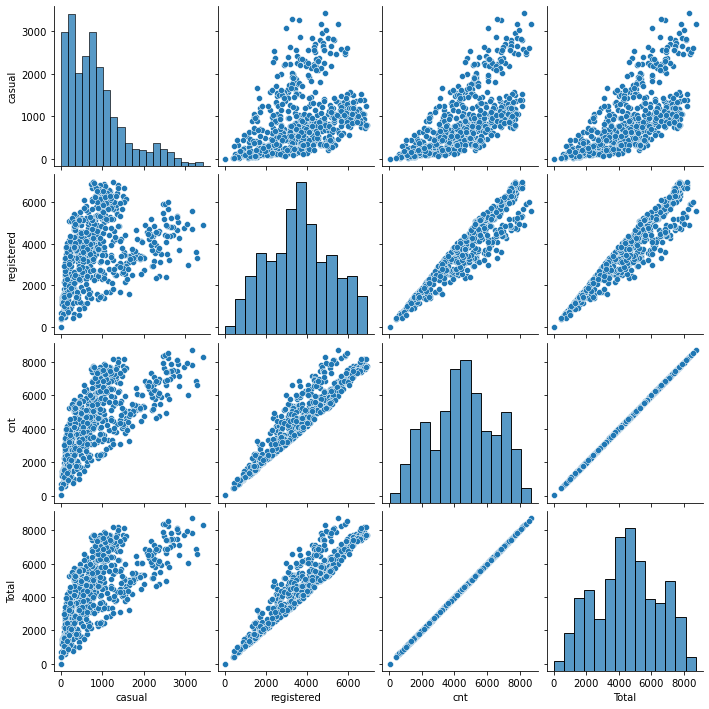

In [12]:
#with the head printed, it shows that cnt is sum of casual and registered. 
# create a pair plot for better visual analysis

sns.pairplot(bike_temp)
plt.show


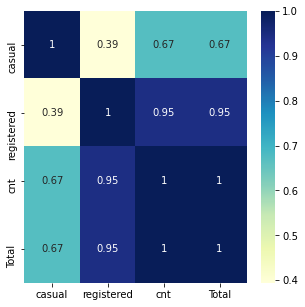

In [13]:
# Check the correlation coeffecients between variables to conclude by heat map
plt.figure(figsize = (5, 5))
sns.heatmap(bike_temp.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Drop unwanted columns 

1. With the above pair plot and heat map, we can clearly see the cnt is the sum of registered and casual column. 
So, we can drop both casual and registered column since the those counts are already part of cnt column.

2. instant column can be dropped since it only gives the index of rows.

3. dteday has very good information on the date of bike rented. but we can also see the split of this day in numeric columns i.e. month and yr. so we can drop dteday


In [14]:
#Drop casual and registered column
bikesharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bikesharing.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
bikesharing.shape

(730, 12)

# Convert categorical columns as per the data dictionary
1. Weathersit
2. Season
3. Month
4. Weekday

In [16]:
#convert weekday column to category and replace with string
#bikesharing.weekday.dtype
bikesharing['weekday'] = bikesharing['weekday'].astype('category',copy=False)
bikesharing['weekday'] = bikesharing['weekday'].replace((0,1,2,3,4,5,6),('Sun','Mon','Tue','Wed','Thu','Fri','Sat'))
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
#Convert month column to categorical column
bikesharing['mnth'] = bikesharing['mnth'].astype('category',copy=False)
bikesharing['mnth'] = bikesharing['mnth'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'))
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
#Convert season to categorical column based the information in data dictionary
bikesharing['season'] = bikesharing['season'].astype('category',copy=False)
bikesharing['season'] = bikesharing['season'].replace((1,2,3,4),('spring','summer','fall','winter'))
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
#Convert weathersit to categorical column based the information in data dictionary
bikesharing['weathersit'] = bikesharing['weathersit'].astype('category',copy=False)
bikesharing['weathersit'] = bikesharing['weathersit'].replace((1,2,3,4),('clear','mist','snow','rain'))
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='workingday', ylabel='cnt'>

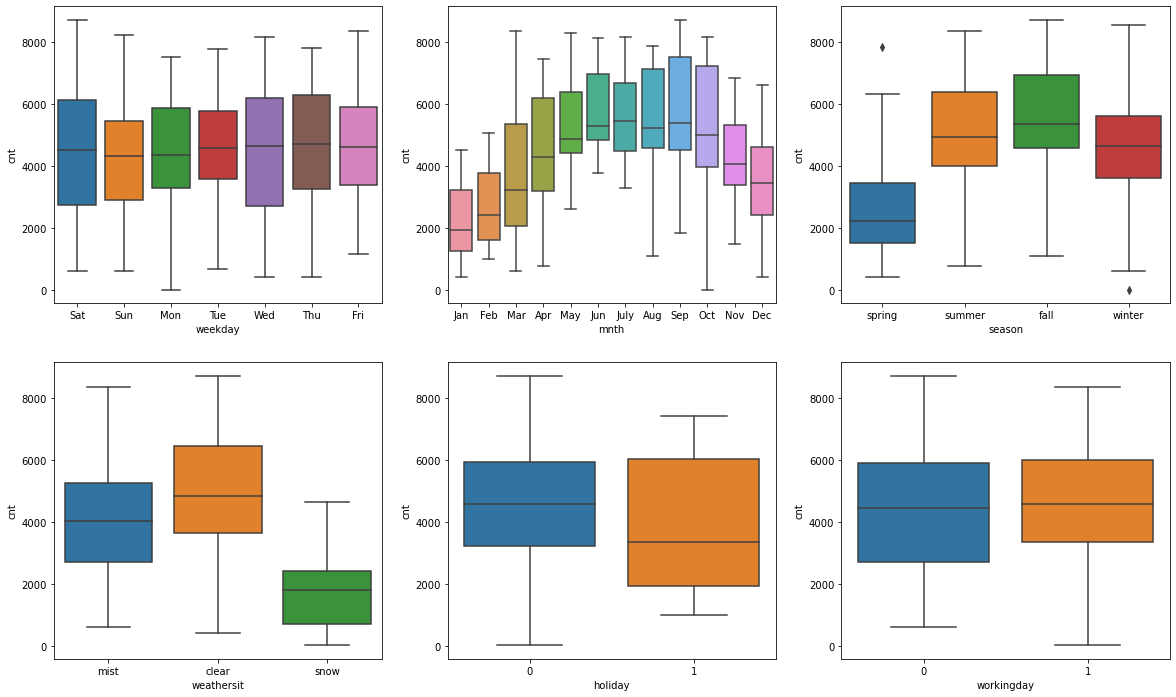

In [20]:
#Box plot the categorical variables
#1. Weekday, 2. Month 3.Season 4. Weathersit
#Box plot holiday and workingday as well
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for 
`season` with `year` as the hue
`mnths` with `year` as the hue
`weathersit` with `year` as the hue
`weekday` with `year` as the hue

<AxesSubplot:xlabel='season', ylabel='cnt'>

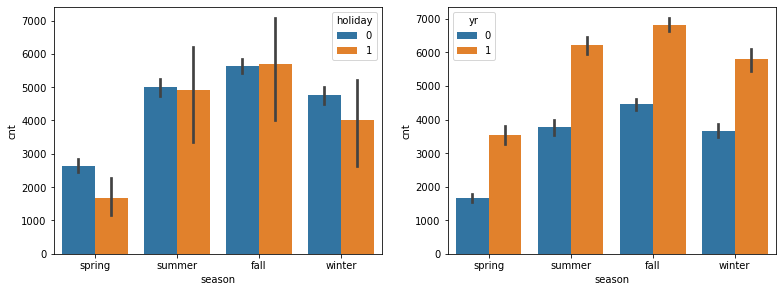

In [21]:
#Year 0 = 2018, 1=2019
plt.figure(figsize = (20, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'season', y = 'cnt', hue = 'holiday', data = bikesharing)
plt.subplot(2,3,2)
sns.barplot(x = 'season', y = 'cnt', hue = 'yr', data = bikesharing)

With both the charts above, we can see the maximum spread is around season fall followed by summer, winter in both holiday/no holiday period and in both 2018 and 2019 year. So season can be a good predictor for dependent variable.

Also, we can see demand gone up in yr 2019 in both the seasons.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

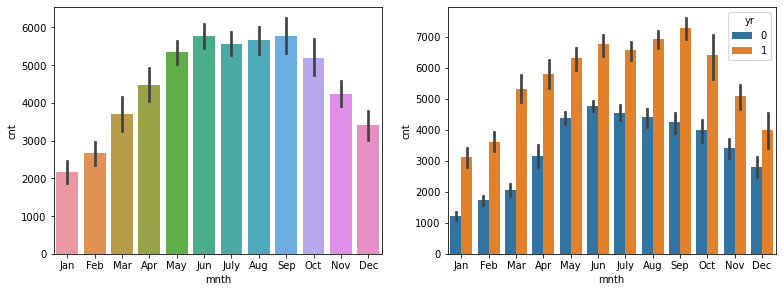

In [22]:
#Analyse spread of data across months
#Year 0 = 2018, 1=2019
plt.figure(figsize = (20, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'mnth', y = 'cnt',data = bikesharing)
plt.subplot(2,3,2)
sns.barplot(x = 'mnth', y = 'cnt', hue = 'yr', data = bikesharing)

With both the charts above, we can see the maximum spread is around months from May to Oct with more 4000 bookings and peak in sep. we can see a pattern around these booking and can be a good predictor.

Also, we can see demand gone up in yr 2019 with some pattern in distribution of data across months.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

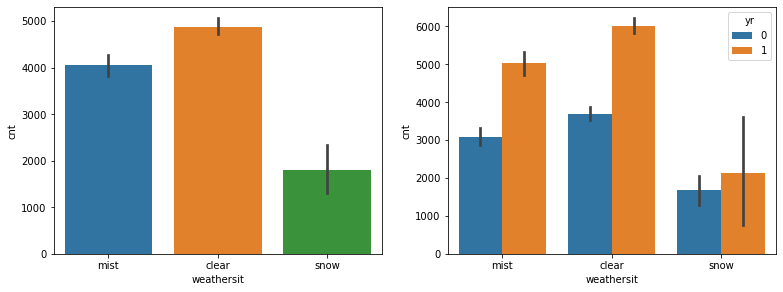

In [23]:
#Analyse spread of data across weathersit
#Year 0 = 2018, 1=2019
plt.figure(figsize = (20, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'weathersit', y = 'cnt',data = bikesharing)
plt.subplot(2,3,2)
sns.barplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = bikesharing)

With both the charts above, we can see the maximum booking in clear weather followed by mist weather. Also, in current data frame there is no data with weathersit 4 i.e heavy rain. 
we can see a pattern around these booking and can be a good predictor for depedent variable

Also, we can see demand gone up in yr 2019 with some pattern in distribution of data across months.

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

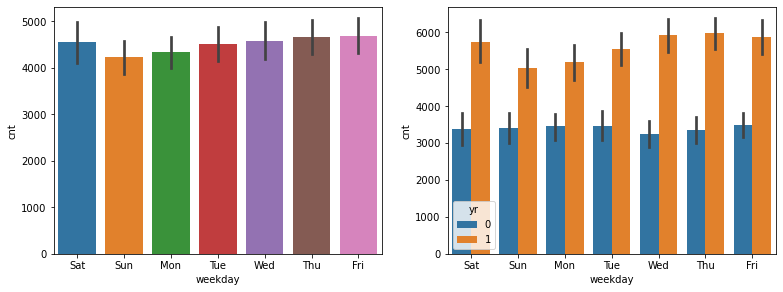

In [24]:
#Analyse spread of data across weekday
#Year 0 = 2018, 1=2019
plt.figure(figsize = (20, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'weekday', y = 'cnt',data = bikesharing)
plt.subplot(2,3,2)
sns.barplot(x = 'weekday', y = 'cnt', hue = 'yr', data = bikesharing)

With both the charts above, we can see the booking are spread with very little variables across all days of week. So this variable may or may not have much influence the prediction. Further analysis is required to conclude on this.


# Analyse the numeric variables

In [25]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 90.3+ KB


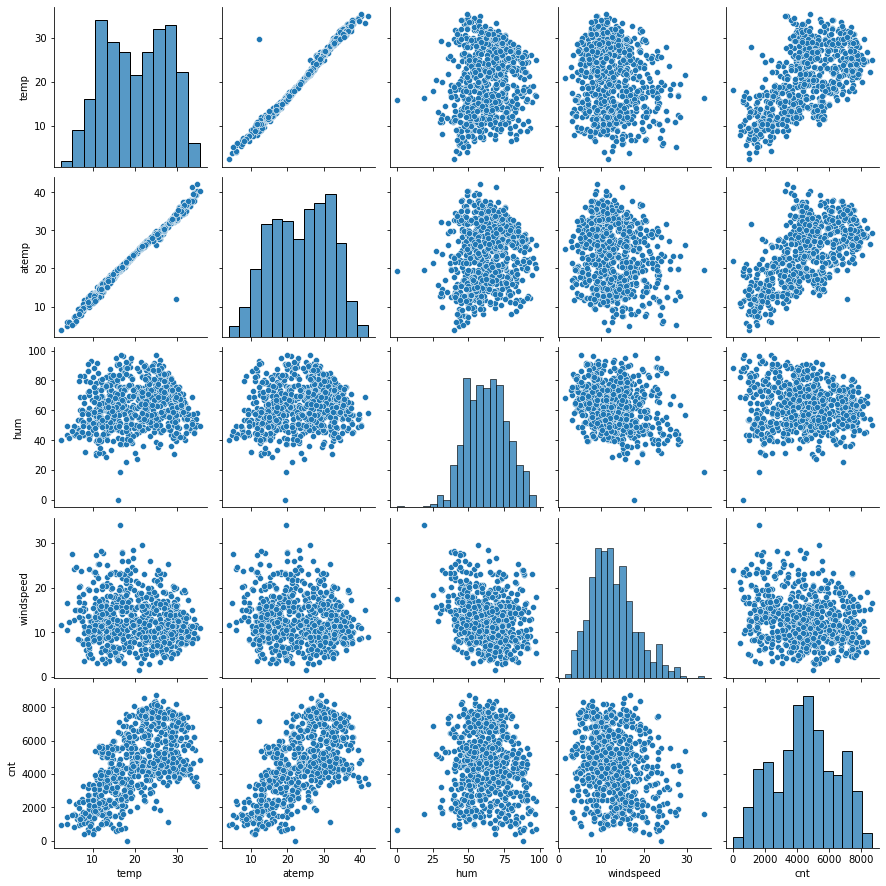

In [26]:
#list the numeric variables and plot a pair plot
bike_numvars = ['temp','atemp','hum','windspeed','cnt']
bike_num = bikesharing[bike_numvars]
sns.pairplot(bike_num)

<AxesSubplot:>

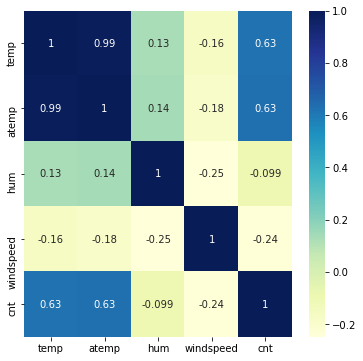

In [27]:
#Analyse the correlation between numeric variables
plt.figure(figsize=(6,6))
sns.heatmap(bike_num.corr(), annot=True, cmap='YlGnBu')

we can clearly see a linear relationship between atemp and temp. So these variables cannot be used in model due to multicollinearity.

Also, we have clearly seen from all above analysis that there is a increase in demand in year 2019. Thus year can become a key parameter in the model

# Data Preparation

### Dummy Variables Creation for categorical variables inorder to fit a regression line 
### since string values cannot be used.
### 1. season 2. weathersit 3. weekday 4.month

In [28]:
#Season

seasondf = pd.get_dummies(bikesharing['season'], drop_first=True)
seasondf.head()



,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [29]:
#weathersit
weatherdf = pd.get_dummies(bikesharing['weathersit'], drop_first=True)
weatherdf.head()

,mist,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [30]:
#mnth
mnthdf = pd.get_dummies(bikesharing['mnth'], drop_first=True)
mnthdf.head()

,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [31]:
#weekday
weekdaydf = pd.get_dummies(bikesharing['weekday'], drop_first=True)
weekdaydf.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [32]:
#merge the dummies with original DF
bikesharing = pd.concat([bikesharing, seasondf, weatherdf, weekdaydf, mnthdf], axis=1)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [33]:
bikesharing.info()
#All the 30 columns are numeric columns and are ready to split into train and test data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  mist        730 non-null    uint8  
 16  snow        730 non-null    uint8  
 17  Mon         730 non-null    uint8  
 18  Sat         730 non-null    uint8  
 19  Sun         730 non-null    u

In [34]:
#Remove the unwanted columns related to season, weathersit, mnth, weekday since converted binary columns with dummies are added
bikesharing.drop(['season','weathersit','mnth','weekday'],axis=1,inplace=True)
bikesharing.shape

(730, 30)

In [35]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  mist        730 non-null    uint8  
 12  snow        730 non-null    uint8  
 13  Mon         730 non-null    uint8  
 14  Sat         730 non-null    uint8  
 15  Sun         730 non-null    uint8  
 16  Thu         730 non-null    uint8  
 17  Tue         730 non-null    uint8  
 18  Wed         730 non-null    uint8  
 19  Aug         730 non-null    u

# Step 3 -> Splitting the data into train data and test data in 70:30 ratio
### Train data - 510 rows
### Test Data - 219 rows

In [36]:
np.random.seed(0)
df_train,df_test = train_test_split(bikesharing, train_size=0.7,test_size=0.3,random_state=100)

In [37]:
df_train.shape

(510, 30)

In [38]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
df_test.shape

(219, 30)

In [40]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
#Rescaling the train data set using min max scaling, import the necessary library
scaler = MinMaxScaler()

In [42]:
#numeric variables
print(bike_numvars)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [43]:
#Apply scaler to all the numerical variables except Yes-No and dummy variables
df_train[bike_numvars] = scaler.fit_transform(df_train[bike_numvars])

In [44]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


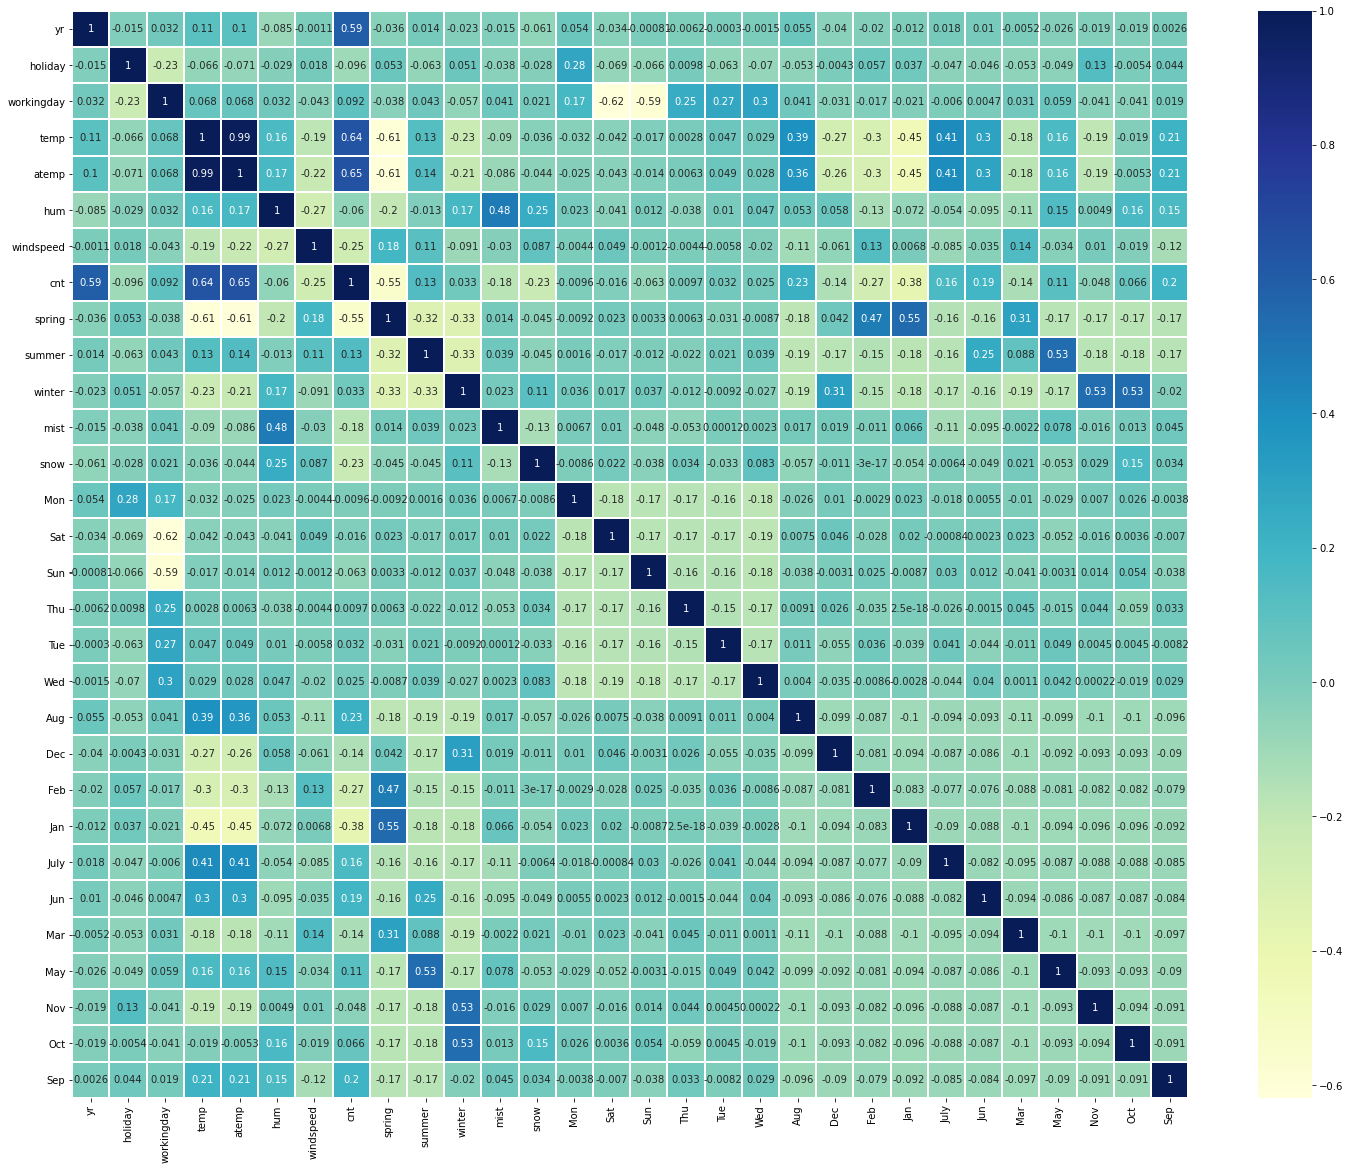

In [45]:
#Check the corr co-effecient between all the variables before going to building the model step
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu',linewidths=1)
plt.show()

#### temp and ateamp has a high correlation of 0.99. So any one parameter can be considered while developing the model
#### yr, temp and atemp have a strong correlation with cnt
#### different months and corresponding weather have a correlation like  (Nov/Oct - Winter (0.53), May - Summer (0.53)), Jan/Feb - Spring (0.47,0.55) etc
#### Spring has negetive correlation with cnt - -0.55



## Step 5 . Building the model

In [46]:
#Dividing into X_train and Y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [47]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [49]:
#RFE Method output no of variables = 15
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [50]:
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [51]:
#check the list of parameters selected
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mist', True, 1),
 ('snow', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 10),
 ('Wed', False, 15),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 13),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1)]

In [52]:
#store the columns selected
rfecol = X_train.columns[rfe.support_]
rfecol

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'mist', 'snow', 'Sat', 'Sun', 'July', 'Sep'],
      dtype='object')

In [53]:
#check which columns have been eliminated
X_train.columns[~rfe.support_]

Index(['atemp', 'Mon', 'Thu', 'Tue', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun',
       'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

In [78]:
#Creating the RFE data frame with
X_train_rfe = X_train[rfecol]

In [79]:
#Add constats
X_train_rfe = sm.add_constant(X_train_rfe)

In [80]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [81]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.13e-191
Time:                        18:50:11   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

In [82]:
#Calculate VIF
# Calculate the VIFs for the new model - define a function
def calculateVIF(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [83]:
calculateVIF(X_train_rfe)

,Features,VIF
2,holiday,inf
3,workingday,inf
12,Sat,inf
13,Sun,inf
7,spring,5.02
4,temp,3.62
9,winter,3.49
8,summer,2.61
5,hum,1.91
10,mist,1.57


In [98]:
#Holiday has high VIF and high p-value. So it is safe to drop it
X_train_new  =  X_train_rfe.drop(['holiday'],axis=1)


In [86]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'mist', 'snow', 'Sat', 'Sun', 'July', 'Sep'],
      dtype='object')

In [99]:
X_train_new  =  X_train_new.drop(['const'],axis=1)

In [100]:
calculateVIF(X_train_new)

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,Sat,4.91
4,windspeed,4.90
5,spring,4.80
11,Sun,4.76
7,winter,3.71
6,summer,3.03
8,mist,2.31


In [101]:
#model 2
X_train_lm1 = sm.add_constant(X_train_new)
lm1 = sm.OLS(y_train, X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.13e-191
Time:                        18:58:32   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

In [102]:
#sping has high p-Value i.e >0.005, low VIF. So drop it
X_train_new  =  X_train_new.drop(['spring'],axis=1)

In [103]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'mist', 'snow', 'Sat', 'Sun', 'July', 'Sep'],
      dtype='object')

In [104]:
calculateVIF(X_train_new)

,Features,VIF
3,hum,25.58
1,workingday,15.42
2,temp,10.54
4,windspeed,4.33
9,Sat,4.20
10,Sun,4.14
7,mist,2.19
0,yr,2.06
5,summer,1.76
6,winter,1.71


In [105]:
#Model 3
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train, X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.77e-191
Time:                        18:59:45   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1204      0.036      3.341      0.0

In [106]:
#p-values are low, but hum has a high VIF of 25,58. so drop hum
X_train_new  =  X_train_new.drop(['hum'],axis=1)
calculateVIF(X_train_new)

,Features,VIF
1,workingday,8.95
2,temp,8.77
3,windspeed,4.33
8,Sat,2.80
9,Sun,2.63
0,yr,2.05
4,summer,1.76
5,winter,1.58
6,mist,1.58
10,July,1.53


In [107]:
#Model 4
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train, X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.92e-188
Time:                        19:00:32   Log-Likelihood:                 503.63
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     497   BIC:                            -926.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0228      0.030      0.769      0.4

In [108]:
#Sun has low VIF, but high p-value i.e >0.005 so it is safe to drop
X_train_new  =  X_train_new.drop(['Sun'],axis=1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.34
1,workingday,4.06
3,windspeed,3.45
0,yr,2.02
4,summer,1.75
8,Sat,1.69
6,mist,1.53
9,July,1.53
5,winter,1.47
10,Sep,1.29


In [109]:
#Model 5
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train, X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.02e-188
Time:                        19:01:35   Log-Likelihood:                 501.31
No. Observations:                 510   AIC:                            -978.6
Df Residuals:                     498   BIC:                            -927.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0720      0.019      3.867      0.0

In [110]:
# July has high p-value of 0.041 i.e > 0.005. So it is safe to drop
X_train_new  =  X_train_new.drop(['July'],axis=1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
8,Sat,1.69
4,summer,1.57
6,mist,1.53
5,winter,1.40
9,Sep,1.20
7,snow,1.08


In [111]:
#Model 6
X_train_lm5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train, X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.47e-188
Time:                        19:03:18   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.019      4.051      0.0

In [112]:
#checking the params obtained from final model
lm5.params

const         0.075325
yr            0.233056
workingday    0.056323
temp          0.549936
windspeed    -0.155238
summer        0.087429
winter        0.131826
mist         -0.081347
snow         -0.288021
Sat           0.067688
Sep           0.097236
dtype: float64

The Model looks good as there are low p-values and VIF.
Also very low multi collianearity between the predictors. So good to verify with test data and in case of any issues, model need to be reverified.


In [113]:
## Residual Analysis on train data
y_train_pred = lm5.predict(X_train_lm5)

In [114]:
%matplotlib inline

Text(0.5, 0, 'Errors')

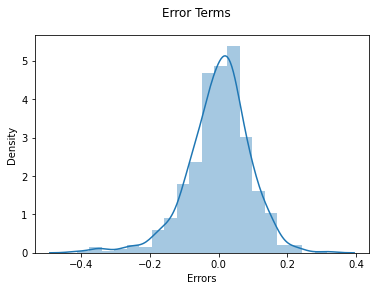

In [117]:
#plot the histogram of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')

With this histogram, we can conclude that error terms are following the normal distribution

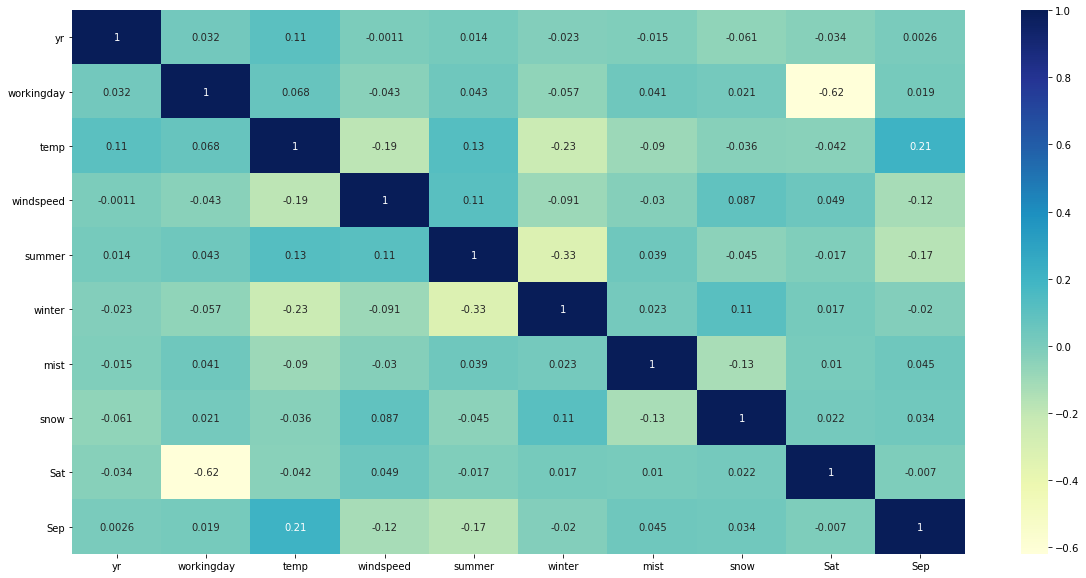

In [135]:
#Multicollinearing validation
plt.figure(figsize=(20,10))
sns.heatmap(X_train_new.corr(),annot=True,cmap='YlGnBu')
plt.show()

### All predictors have VIF less than 5 and also, with above heatmap, we can consider that there is insignificant collinearity between the predictor variables


# Model Evaluation with test data

In [118]:
print(bike_numvars)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [119]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,1,0,0,0,0,0


In [120]:
#scale the test data
df_test[bike_numvars] = scaler.transform(df_test[bike_numvars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


In [121]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
#Dividing X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [123]:
#final model columns
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter', 'mist',
       'snow', 'Sat', 'Sep'],
      dtype='object')

In [124]:
#Select the final columns from test data
X_test = X_test[X_train_new.columns]

In [125]:
X_test.head()

,yr,workingday,temp,windspeed,summer,winter,mist,snow,Sat,Sep
184,0,0,0.831783,0.084219,0,0,1,0,0,0
535,1,1,0.901354,0.153728,1,0,0,0,0,0
299,0,1,0.511964,0.334206,0,1,1,0,0,0
221,0,1,0.881625,0.339570,0,0,0,0,0,0
152,0,1,0.817246,0.537414,1,0,0,0,0,0


In [126]:
X_test_lm = sm.add_constant(X_test)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   windspeed   219 non-null    float64
 5   summer      219 non-null    uint8  
 6   winter      219 non-null    uint8  
 7   mist        219 non-null    uint8  
 8   snow        219 non-null    uint8  
 9   Sat         219 non-null    uint8  
 10  Sep         219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [127]:
#make predictions using final model on test data Final Model is lm5
y_test_pred = lm5.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

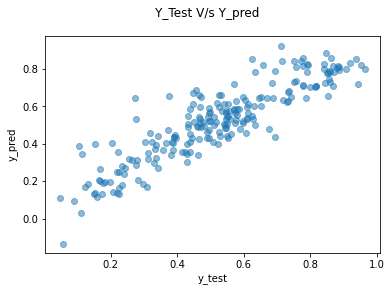

In [128]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=0.5)
fig.suptitle('Y_Test V/s Y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [130]:
#R2 calcualation for train data frame
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8357769866151917

In [129]:
#R2 calcualation for test data frame
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7955844377237249

In [133]:
#adjusted R2 Test
n = X_test.shape[0]
p=X_test.shape[1]
adjustedr2_test = round(1-(1-r2_score(y_test, y_test_pred))*(n-1)/(n-p-1),4)
adjustedr2_test

0.7858

In [134]:
#adjusted R2 Train
n = X_train.shape[0]
p=X_train.shape[1]
adjustedr2_train = round(1-(1-r2_score(y_train, y_train_pred))*(n-1)/(n-p-1),4)
adjustedr2_train

0.8259

with the above R2 statistics comparison of 83.5% on train data set and 79.55% on test dataset, we can conclude that this model seems to be a very good model.

                        Train Data          test Data
R2                      83.5%               79.55% 

Adjusted R2             82.59%              78.58%

With VIF and p-values within the range, 

# Summary

Top 5 predictors that influence bike booking are

1. temp  with coeffecient value of '0.549936' indicates that it has high influence on the bike renting
2. snow(weathersit = 5) with coeffcient value of -0.288021 indicates that it brings down the booking count of bike
3. yr with coeffecient value 0.233056 proves that booking has improved over years
4. winter and 
5. Sep month has also some amount of influence in favouring the bike renting from customers.